                                                        Lab | Cleaning numerical data

Context: An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

1- Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

pd.set_option('display.max_columns', None)


2- Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3- First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4- Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
def standardise_column_names(df):
    for columns in df.columns:
        c_low = columns.lower()
        c_standard = '_'.join(c_low.split(' '))
        df.rename({columns: c_standard}, inplace=True, axis=1)
    return df

customer_df = standardise_column_names(customer_df)
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


5- Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format= '%m/%d/%y')
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


6- Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [8]:
numerical_df=customer_df.select_dtypes('number')
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


7- Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
# I choose to define discrete variables as numerical variables with less than 10 unique values:

def cont_disc_var(df):
    continuous= []
    discrete= []
    for columns in df.columns:
        num_unique= df[columns].nunique()
        if num_unique>10:
            continuous.append(columns)
        else:
            discrete.append(columns)
    return continuous, discrete

cont_disc_var(numerical_df)
    # seems like only 2 columns ('number_of_open_complaints' and 'number_of_policies') are considered discrete variables

(['customer_lifetime_value',
  'income',
  'monthly_premium_auto',
  'months_since_last_claim',
  'months_since_policy_inception',
  'total_claim_amount'],
 ['number_of_open_complaints', 'number_of_policies'])

In [10]:
# Creating the dfs:

continuous_df = numerical_df[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']]
display(continuous_df.head())

discrete_df = numerical_df[['number_of_open_complaints', 'number_of_policies']]
display(discrete_df.head())
    #due to the few unique values that they contain, discrete variables can be considered as categorical variables
    #I won't be doing that for now because treating them as categorical would mean increasing the number of columns after encoding
    #and too many columns can lead to a poorly performing model, however it would be an option to test to try to improve the model later

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


8- Plot a correlation matrix, comment what you see.

Text(0.5, 1.0, 'Correlation Matrix')

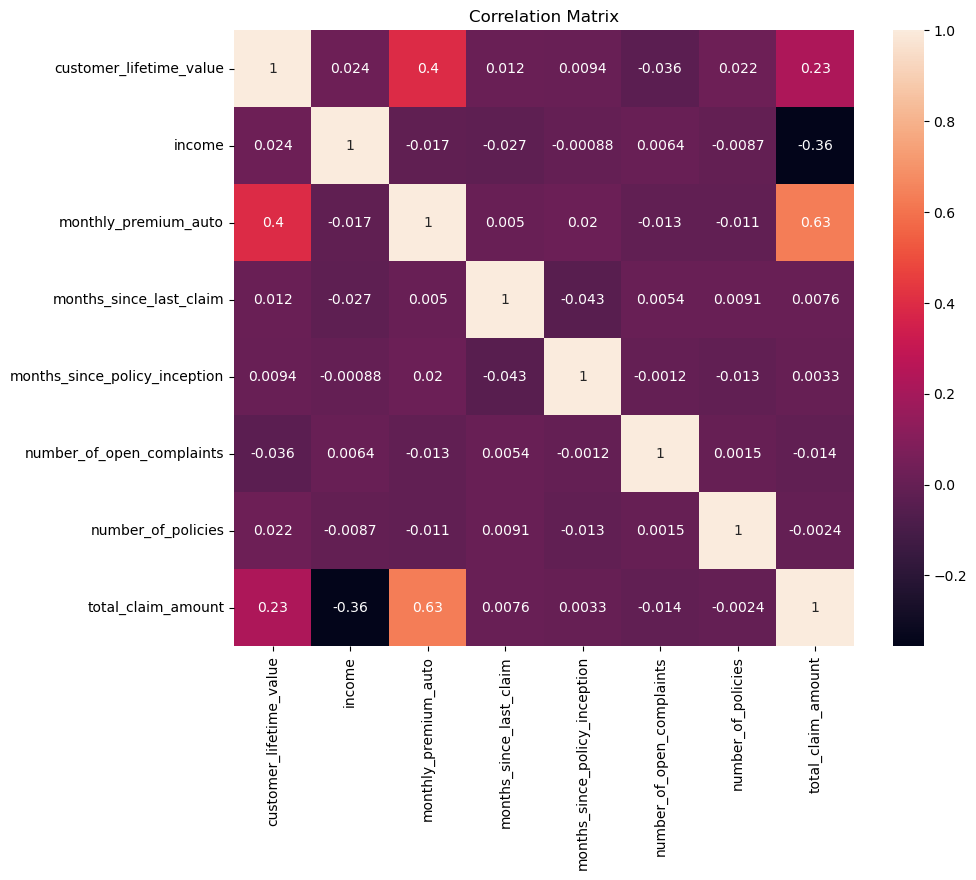

In [11]:
corr_matrix = numerical_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show
plt.title('Correlation Matrix')
    #there is a 'high' correlation between monthly_premium_auto and our target('total_claim_amount')
    #No noticeably high correlation (>0.85) between our features so we can keep them all

9- Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!). 
10- Comment what you can see in the plots.

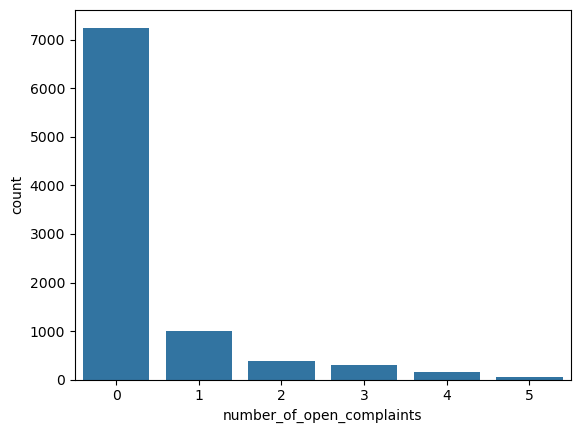

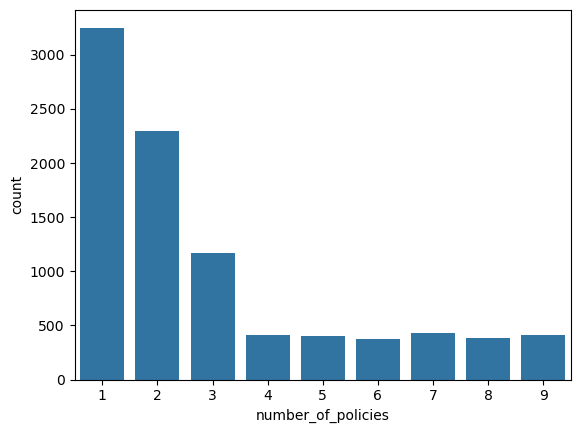

In [12]:
#I'll plot discrete variables using count plots while the continuous variables will be presented in histograms:

for columns in discrete_df:
    sns.countplot(x=discrete_df[columns], data=discrete_df)
    plt.show()

    #majority of customers have no open complaints and cumulate 1 or 2 of policies

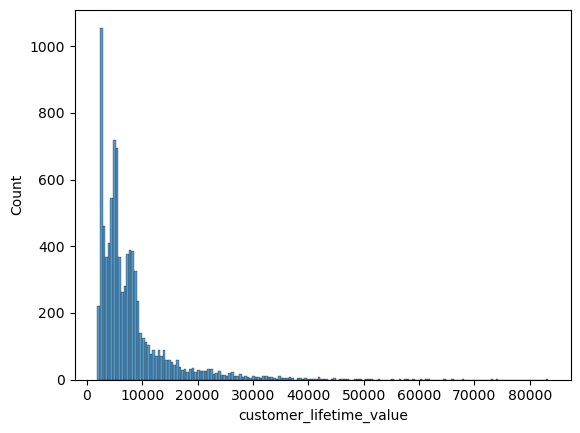

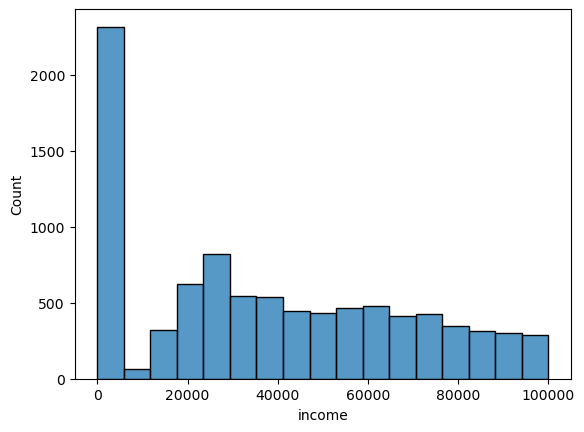

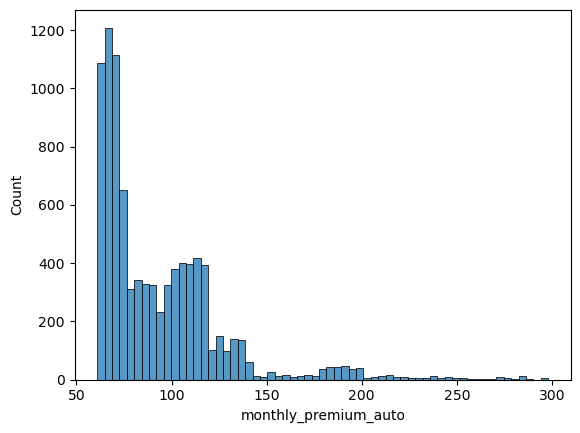

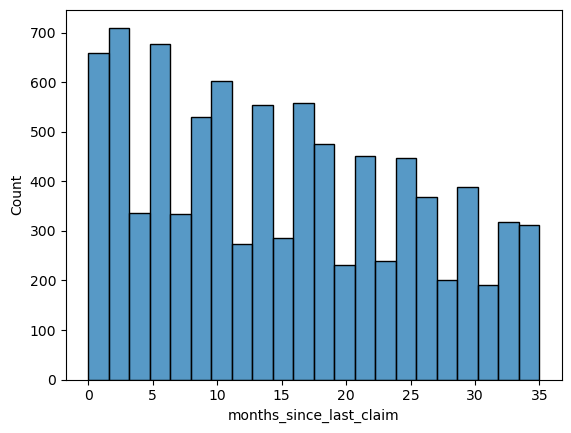

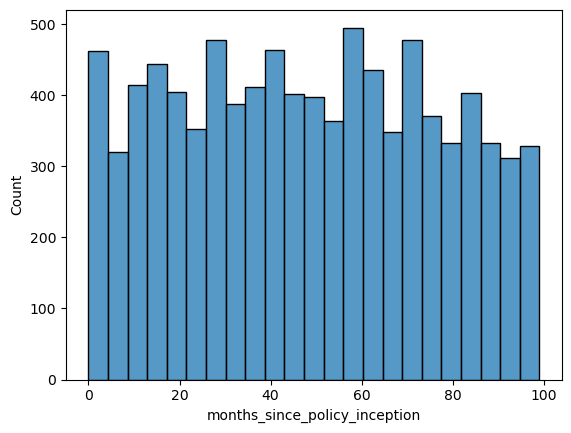

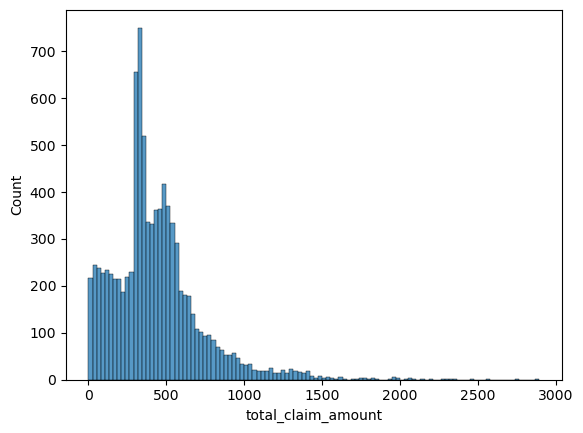

In [13]:
for columns in continuous_df:
    sns.histplot(continuous_df[columns])
    plt.show()

    #for customer_lifetime_value, monthly_premium_auto and total_claim_amount the distribution is quite skewed probably due to the presence of outliers
    #majority of customers are in the lower range of income

11- Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

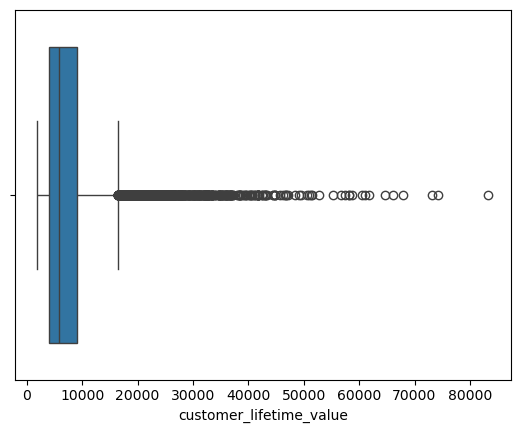

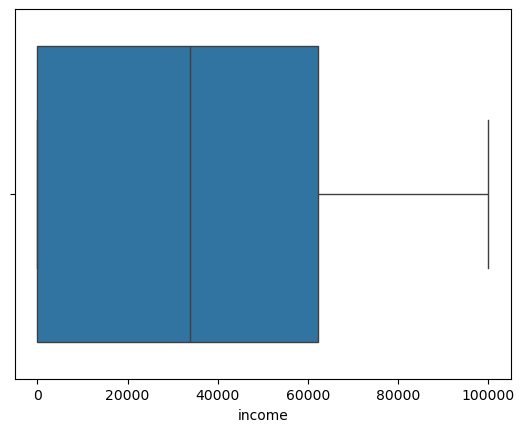

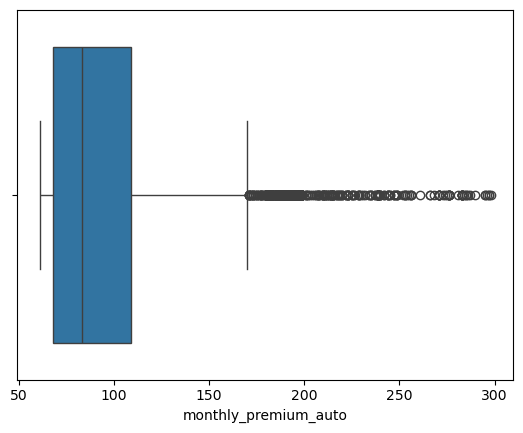

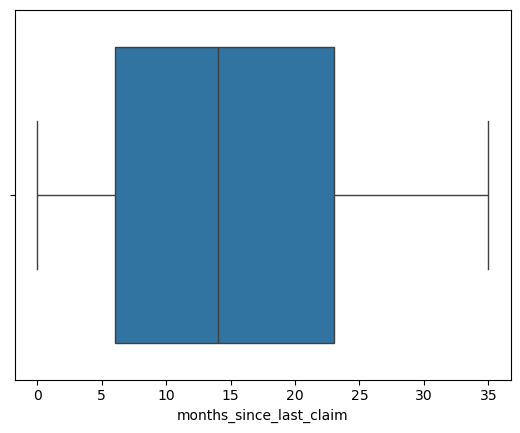

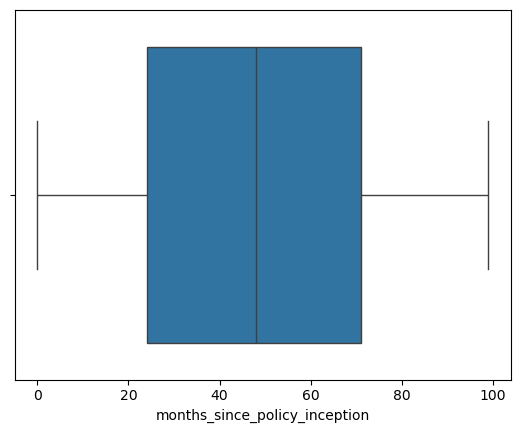

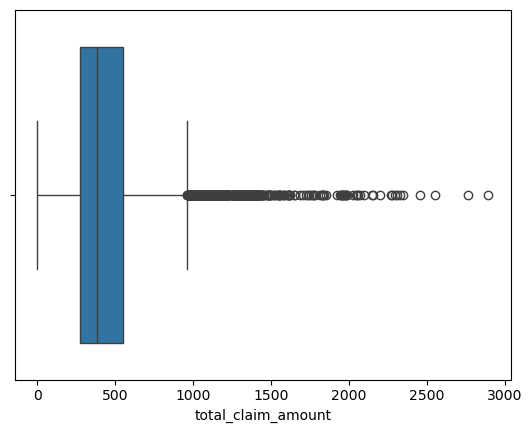

In [14]:
for columns in continuous_df:
    sns.boxplot(x=continuous_df[columns])
    plt.show()

#noticeable outliers in:
    # customer_lifetime_value > 80 000$
    # total_claim_amount with almost 3000$

12- Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

In [15]:
customer_df[customer_df['total_claim_amount']>= 2700 ]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
888,BZ65376,Arizona,8581.278701,No,Extended,Bachelor,2011-01-18,Medical Leave,M,27689,Suburban,Married,239,0,72,2,1,Personal Auto,Personal L2,Offer2,Web,2893.239678,Luxury SUV,Medsize
5074,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2011-02-14,Unemployed,M,0,Suburban,Single,261,33,44,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize


In [16]:
customer_df[customer_df['customer_lifetime_value']> 70000 ]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,2011-01-26,Unemployed,M,0,Suburban,Single,242,1,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.4,Luxury Car,Medsize
5716,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,2011-01-31,Employed,M,58958,Suburban,Married,231,31,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.8,Luxury Car,Small
6252,BP23267,California,73225.95652,No,Extended,Bachelor,2011-02-09,Employed,F,39547,Suburban,Married,202,11,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.6,Luxury SUV,Medsize


In [17]:
#to eliminate outliers, I would have to drop 5 rows out of 9134 rows which could be considered negligible (should end up with 9129 rows)
#keeping that in mmind I've decided to drop this rows

#removing from main dataframe:
customer_df = customer_df.drop(customer_df[customer_df['total_claim_amount']>= 2700 ].index).reset_index(drop=True)
customer_df = customer_df.drop(customer_df[customer_df['customer_lifetime_value']> 70000 ].index).reset_index(drop=True)
customer_df

#removing from numerical_df:
numerical_df = numerical_df.drop(numerical_df[numerical_df['total_claim_amount']>= 2700 ].index).reset_index(drop=True)
numerical_df = numerical_df.drop(numerical_df[numerical_df['customer_lifetime_value']> 70000 ].index).reset_index(drop=True)
numerical_df


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9124,23405.987980,71941,73,18,89,0,2,198.234764
9125,3096.511217,21604,79,14,28,0,1,379.200000
9126,8163.890428,0,85,9,37,3,2,790.784983
9127,7524.442436,21941,96,34,3,0,3,691.200000


13- Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [18]:
numerical_df.isna().sum()
#there is no NaN values in our df so I'll keep it as is.

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

14- Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [19]:
#numerical_df.to_csv('numerical.csv', index=False)

                                                            Lab | Cleaning categorical data

1- Find all of the categorical data. Save it in a categorical_df variable.

In [20]:
categorical_df = customer_df.select_dtypes('object')
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9125,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9126,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9127,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


2- Check for NaN values and decide what to do with them, do it now.

In [21]:
categorical_df.isna().sum()
    #it doesn't seem like there's NaN values that will require being dealt with

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

3- Check all unique values of columns.

In [22]:
for columns in categorical_df.columns:
    print(categorical_df[columns].value_counts(dropna=False))
    print('')

customer
BU79786    1
IW56740    1
WW52683    1
XO38850    1
DB50188    1
          ..
DA28072    1
HS14476    1
YL91587    1
CT18212    1
Y167826    1
Name: count, Length: 9129, dtype: int64

state
California    3149
Oregon        2600
Arizona       1702
Nevada         881
Washington     797
Name: count, dtype: int64

response
No     7821
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2738
Premium      823
Name: count, dtype: int64

education
Bachelor                2746
College                 2681
High School or Below    2619
Master                   741
Doctor                   342
Name: count, dtype: int64

employmentstatus
Employed         5696
Unemployed       2315
Medical Leave     431
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4657
M    4472
Name: count, dtype: int64

location_code
Suburban    5774
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5295
Single      2465
D

4- Check dtypes. Do they all make sense as categorical data?

In [23]:
categorical_df.dtypes
    #keeping in mind that this df does not contain the date column, I find that it all variables make sense as categorical data
    #we could also get rid of customer column

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

5- Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [24]:
#The columns 'customer', 'policy' and 'renew_offer_type' contain alpha and numeric data
#Aside from dropping 'customer' and 'policy' I would not choose to transform those data
    #reason for dropping them = because they are either too unique or redundant
#for 'renew_offer_type', cleaning the word 'offer' to only keep the number would also require to set the numbers '1,2,3 and 4' as object for encoding
    #its adding steps when the encoding would work just as well on the data as is

6- Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [25]:
#First I'll group Sports Car, Luxury SUV and Luxury Car into a 'Luxury' class to reduce the number of values in vehicle_class

def clean_cars(x):
    if x in ["Sports Car", "Luxury SUV", "Luxury Car"]:
        return 'Luxury'
    else:
        return x
        
categorical_df['vehicle_class'] = list(map(clean_cars, categorical_df['vehicle_class']))
categorical_df['vehicle_class'].value_counts(dropna=False)

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            826
Name: count, dtype: int64

In [26]:
#I'll also group Bachelor, College, Master and Doctor into 'College or Higher' category for education:

def clean_education(x):
    if x in ["Bachelor", "College", "Master", "Doctor"]:
        return 'College or Higher'
    else:
        return x
        
categorical_df['education'] = list(map(clean_education, categorical_df['education']))
categorical_df['education'].value_counts(dropna=False)

education
College or Higher       6510
High School or Below    2619
Name: count, dtype: int64

7- Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [27]:
#policy_type and policy contain the same information with the latter being a bit more precise
#in my opinion to reduce the number of variables for encoding it would be wiser to only keep policy_type

categorical_df = categorical_df.drop(['policy'], axis=1)
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,College or Higher,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,College or Higher,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,College or Higher,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,College or Higher,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,College or Higher,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,LA72316,California,No,Basic,College or Higher,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9125,PK87824,California,Yes,Extended,College or Higher,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9126,TD14365,California,No,Extended,College or Higher,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9127,UP19263,California,No,Extended,College or Higher,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


8- Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [28]:
for columns in categorical_df.columns:
    print(categorical_df[columns].value_counts(dropna=False))
    print('')
    
#Aside from the modifications already done at step 6, I will modify the 'state' and 'employmentstatus' values to lessen the number of categories
#I'll also drop the customerID column now

customer
BU79786    1
IW56740    1
WW52683    1
XO38850    1
DB50188    1
          ..
DA28072    1
HS14476    1
YL91587    1
CT18212    1
Y167826    1
Name: count, Length: 9129, dtype: int64

state
California    3149
Oregon        2600
Arizona       1702
Nevada         881
Washington     797
Name: count, dtype: int64

response
No     7821
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2738
Premium      823
Name: count, dtype: int64

education
College or Higher       6510
High School or Below    2619
Name: count, dtype: int64

employmentstatus
Employed         5696
Unemployed       2315
Medical Leave     431
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4657
M    4472
Name: count, dtype: int64

location_code
Suburban    5774
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5295
Single      2465
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6784
Corporate

In [29]:
#for 'state', I'll combine Nevada and Washington into 'Others'

def clean_state(x):
    if x in ["Nevada", "Washington"]:
        return 'Others'
    else:
        return x
        
categorical_df['state'] = list(map(clean_state, categorical_df['state']))
categorical_df['state'].value_counts(dropna=False)

state
California    3149
Oregon        2600
Arizona       1702
Others        1678
Name: count, dtype: int64

In [30]:
#for employmentstatus I'll integrate Medical Leave and Disabled into 'Employed' an Retired into 'Unemployed'

def clean_employment(x):
    if x in ["Medical Leave", "Disabled"]:
        return 'Medical Circumstances'
    else:
        return x
        
categorical_df['employmentstatus'] = list(map(clean_employment, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts(dropna=False)

employmentstatus
Employed                 5696
Unemployed               2315
Medical Circumstances     836
Retired                   282
Name: count, dtype: int64

In [31]:
#looking at the data we might want to merge agent/branch and call center/web from the sales_channel
# but grouping the categories too much could lead too not having enough differences to distinguish our customers 
# for this reason, I'll leave it as is for now and comme back to it if needed to improve the prediction model

# def clean_sales_channel(x):
#     if x in ["Agent", "Branch"]:
#         return 'In person'
#     else:
#         return 'Online'
        
# categorical_df['sales_channel'] = list(map(clean_sales_channel, categorical_df['sales_channel']))
# categorical_df['sales_channel'].value_counts(dropna=False)

In [32]:
#dropping customer column:

categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Others,No,Basic,College or Higher,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,College or Higher,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Others,No,Premium,College or Higher,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,College or Higher,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Others,No,Basic,College or Higher,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,California,No,Basic,College or Higher,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9125,California,Yes,Extended,College or Higher,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9126,California,No,Extended,College or Higher,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9127,California,No,Extended,College or Higher,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


9- Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [33]:
#categorical_df.to_csv('categorical.csv', index=False)

                                                             Lab | Feature extraction

2- Plot all the categorical variables with the proper plot. What can you see?

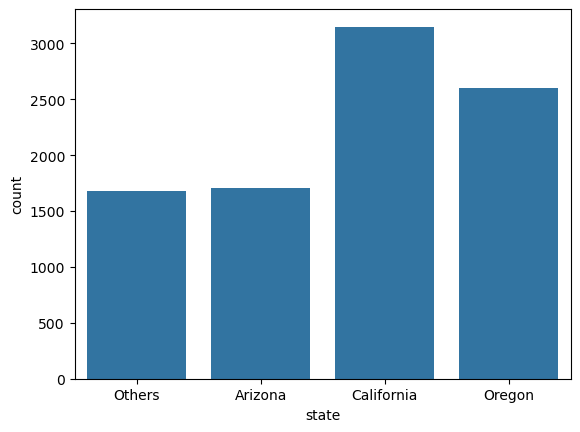

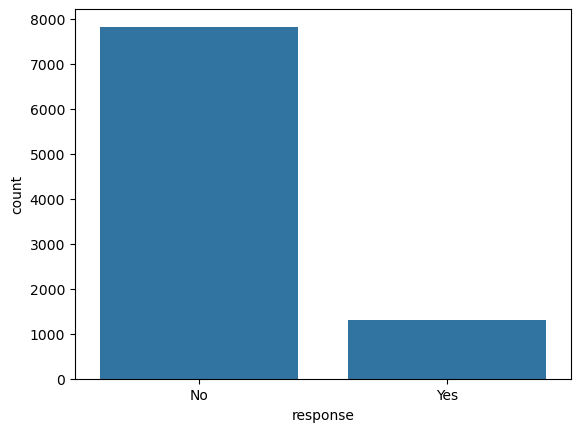

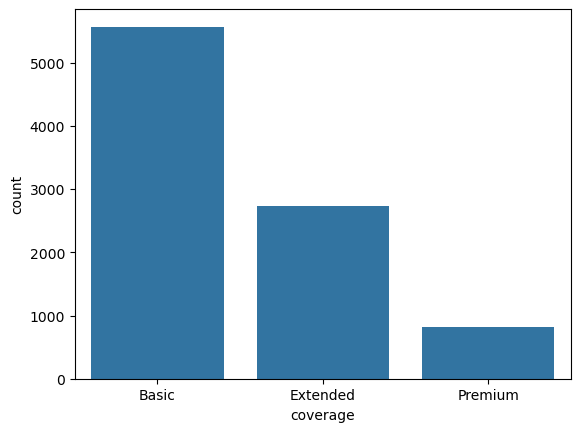

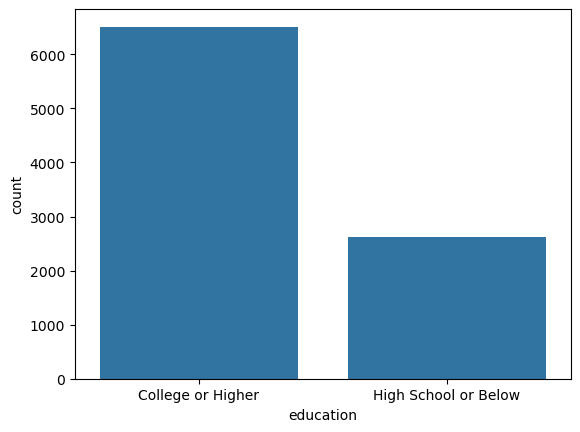

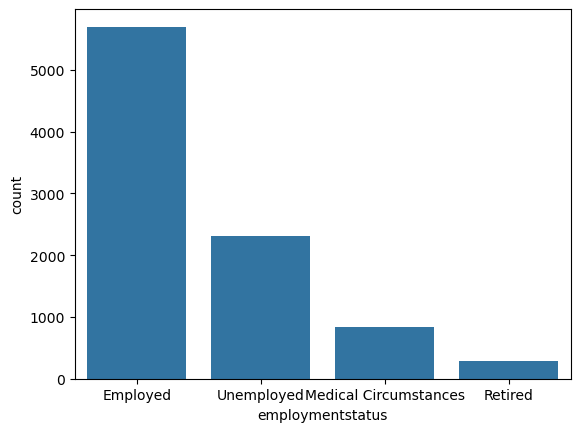

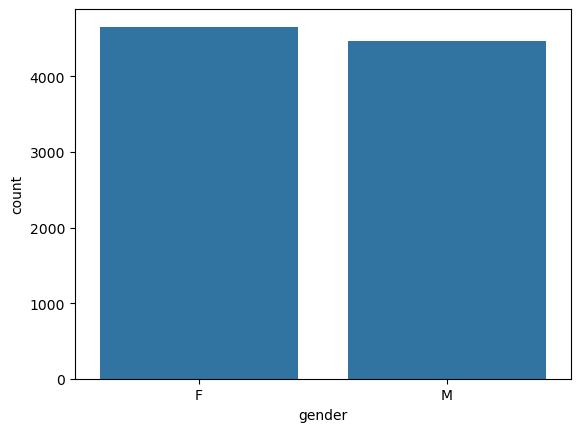

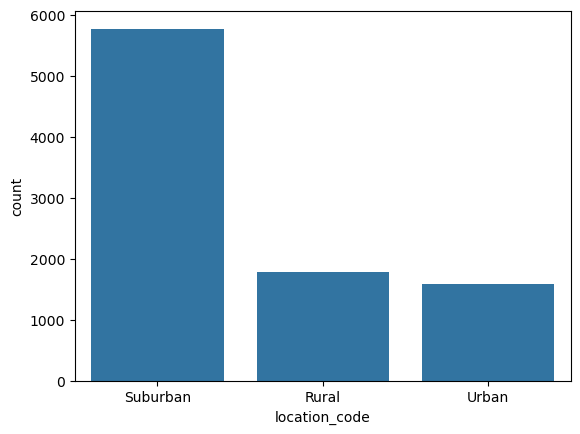

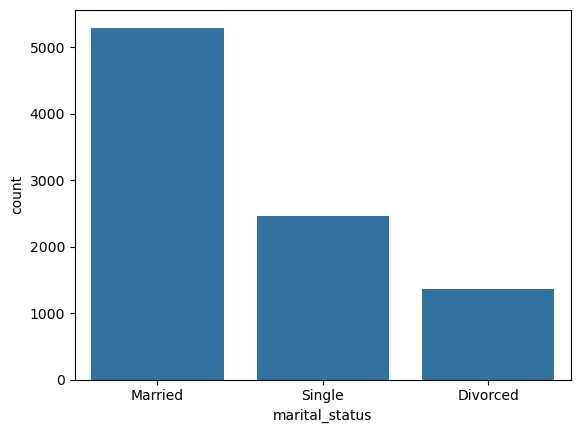

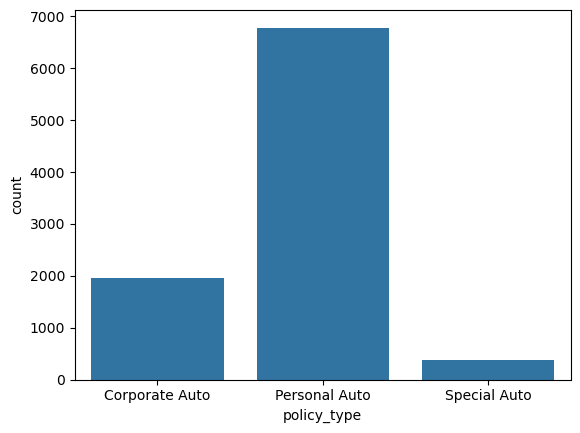

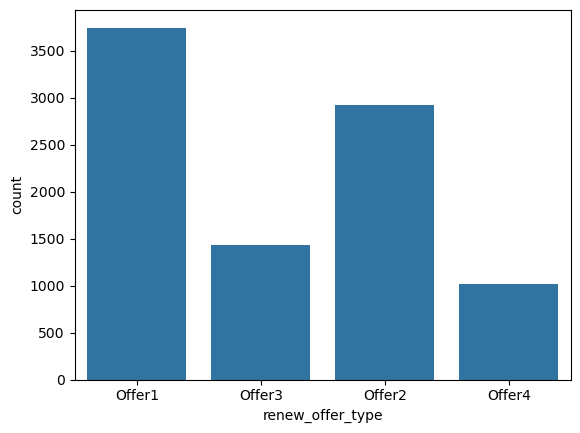

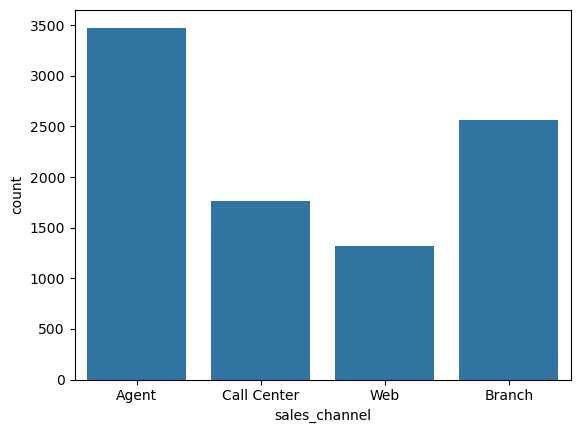

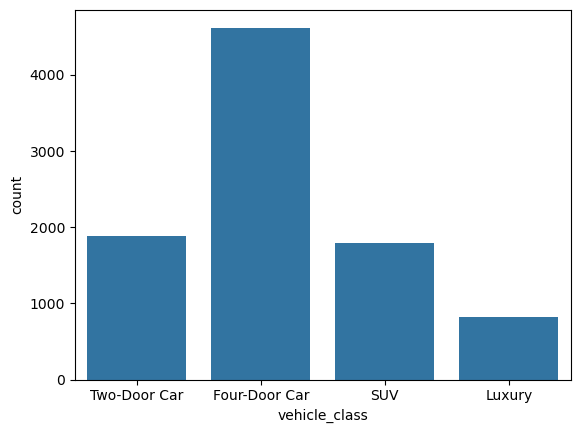

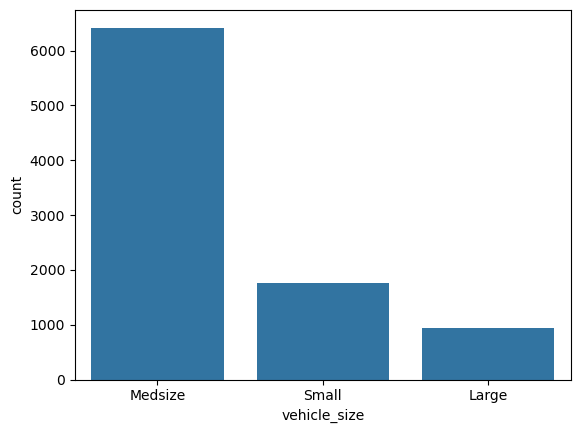

In [34]:
for columns in categorical_df:
    sns.countplot(x=categorical_df[columns], data=categorical_df)
    plt.show()

#From the distribution of the values we can see that the majority of customers:
    #reside in California or Oregon
    #do not respond
    #have a basic coverage insurance
    #have an education level of college or higher
    #are employed, are married and live in a suburban area
    #are almost equally distributed between male and female (small majority of female customers)
    #have a personal auto policy type
    #benefit from offer 1 or 2 when they renew their contracts
    #have a medium size, four-door vehicle
    #sign their contract with an agent or the branch sales channel


3- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
Make any changes you feel are necessary.

In [35]:
#For now, I don't feel that there is a need for changes in the data but it might be a point to change depending on the performance of our model

4- Plot time variable. Can you extract something from it?

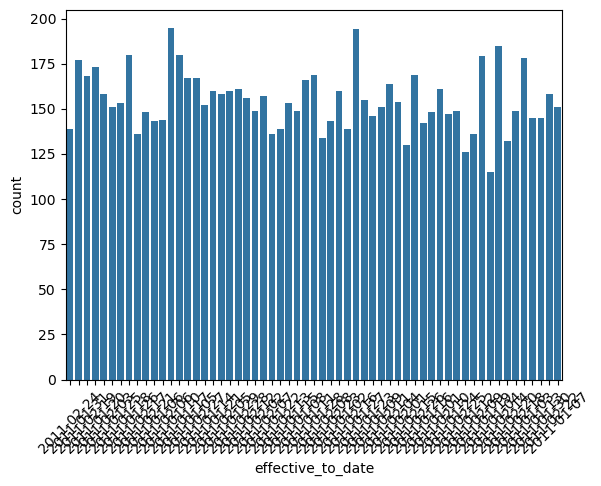

In [36]:
sns.countplot(x='effective_to_date', data=customer_df)
plt.xticks(rotation=45)
plt.show()
#aside form observing that the distribution seems pretty uniform we can nt get much information from this time variable
#it is difficult to read the data even when rotating the labels

5- The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [37]:
customer_df['day_of_week'] = customer_df['effective_to_date'].dt.weekday
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day_of_week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,3
9125,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5
9126,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6
9127,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3


In [38]:
customer_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day_of_week,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,3,6
9125,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5,6
9126,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,5
9127,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,5


In [39]:
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day_of_week,week,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3,8,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,5,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,7,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,3,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,3,6,2
9125,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5,6,2
9126,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,5,2
9127,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,5,2


In [40]:
print(customer_df['day_of_week'].value_counts(dropna=False))
print('')

print(customer_df['week'].value_counts(dropna=False))
print('')

print(customer_df['month'].value_counts(dropna=False))
print('')

day_of_week
0    1528
5    1397
6    1330
3    1249
4    1245
2    1219
1    1161
Name: count, dtype: int64

week
4       1146
3       1136
5       1104
2       1079
8       1073
1       1049
7       1039
6       1034
52       308
9        161
<NA>       0
Name: count, dtype: Int64

month
1    4895
2    4234
Name: count, dtype: int64



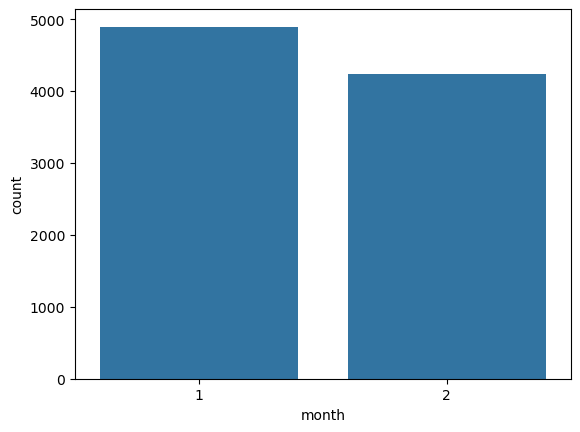

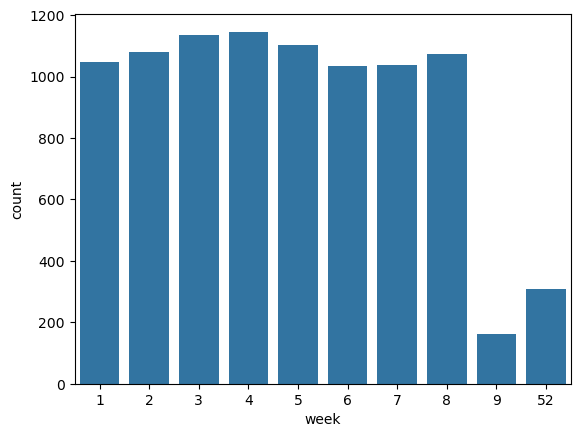

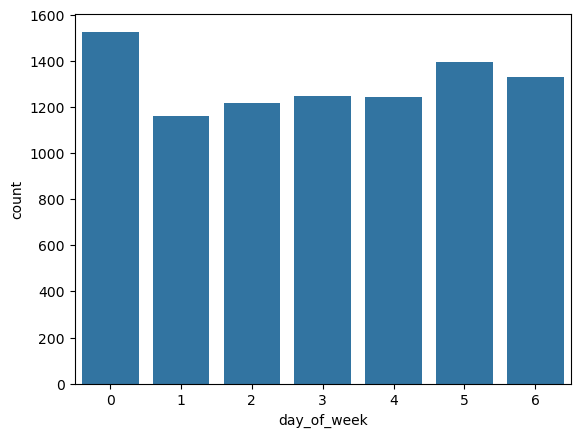

In [41]:
sns.countplot(x='month', data=customer_df)
plt.show()

sns.countplot(x='week', data=customer_df)
plt.show()

sns.countplot(x='day_of_week', data=customer_df)
plt.show()

# most noticeable difference is between weeks
# it seems like a majority of contract begin on monday (day 0) and in January (month 1)

In [42]:
#Even though 'month' could provide us with more information, I am still unsure of using that variable so I will not be using it to build my model

In [43]:
#I'll add the date columns to the categorical dataframe to include the date variable in my analysis
categorical_df['month']= customer_df['month']
categorical_df['week']= customer_df['week']
categorical_df['day_of_week']= customer_df['day_of_week']
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,week,day_of_week
0,Others,No,Basic,College or Higher,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2,8,3
1,Arizona,No,Extended,College or Higher,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1,5,0
2,Others,No,Premium,College or Higher,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2,7,5
3,California,No,Basic,College or Higher,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,1,3,3
4,Others,No,Basic,College or Higher,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,California,No,Basic,College or Higher,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,2,6,3
9125,California,Yes,Extended,College or Higher,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2,6,5
9126,California,No,Extended,College or Higher,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2,5,6
9127,California,No,Extended,College or Higher,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2,5,3


In [44]:
#categorical_df.to_csv('categorical.csv', index=False)

                                                        Lab | Comparing regression models

In [45]:
data = pd.concat([numerical_df, categorical_df], axis=1)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,week,day_of_week
0,2763.519279,56274,69,32,5,0,1,384.811147,Others,No,Basic,College or Higher,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2,8,3
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,Extended,College or Higher,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1,5,0
2,12887.431650,48767,108,18,38,0,2,566.472247,Others,No,Premium,College or Higher,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2,7,5
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,Basic,College or Higher,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,1,3,3
4,2813.692575,43836,73,12,44,0,1,138.130879,Others,No,Basic,College or Higher,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,23405.987980,71941,73,18,89,0,2,198.234764,California,No,Basic,College or Higher,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,2,6,3
9125,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,Extended,College or Higher,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2,6,5
9126,8163.890428,0,85,9,37,3,2,790.784983,California,No,Extended,College or Higher,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2,5,6
9127,7524.442436,21941,96,34,3,0,3,691.200000,California,No,Extended,College or Higher,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,2,5,3


In [46]:
#setting some categories as categorical to encode them instead of normalizing them later
def set_type(df):
    list=['number_of_open_complaints', 'number_of_policies', 'month', 'week', 'day_of_week']
    for columns in df.columns:
        if columns in list:
            df[columns] = df[columns].astype(object)
    return df

set_type(data)
data.dtypes
        

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints         object
number_of_policies                object
total_claim_amount               float64
state                             object
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
location_code                     object
marital_status                    object
policy_type                       object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
month                             object
week                              object
day_of_week                       object
dtype: object

1- In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [47]:
# separating the data using a train-test-split
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# and resetting the index
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)


2- Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [48]:
def split_num_cat(df):
    df_num = df.select_dtypes(include=np.number)
    df_cat = df.select_dtypes(include=object)
    return df_num, df_cat

X_train_num, X_train_cat = split_num_cat(X_train)
X_test_num, X_test_cat = split_num_cat(X_test)

3- Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [49]:
X_train_num.describe().T
    #quite a huge difference in value range between variables

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7303.0,7965.213451,6686.366626,1898.007675,4021.173977,5821.787383,8964.552879,67907.2705
income,7303.0,37501.844447,30331.676489,0.000000,0.000000,33786.000000,61979.500000,99981.0000
monthly_premium_auto,7303.0,93.277283,34.173225,61.000000,69.000000,83.000000,109.000000,297.0000
months_since_last_claim,7303.0,15.156922,10.087960,0.000000,6.000000,14.000000,23.000000,35.0000
months_since_policy_inception,7303.0,48.078187,27.995921,0.000000,24.000000,48.000000,71.000000,99.0000


In [50]:
# Scaling/Normalizing the data

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
display(X_train_scaled.describe().T)
    #data has been successfully scaled between 0 and 1

#applying the transformer to our test set
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7303.0,0.091914,0.101294,0.0,0.032165,0.059443,0.107054,1.0
income,7303.0,0.375090,0.303374,0.0,0.000000,0.337924,0.619913,1.0
monthly_premium_auto,7303.0,0.136768,0.144802,0.0,0.033898,0.093220,0.203390,1.0
months_since_last_claim,7303.0,0.433055,0.288227,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,7303.0,0.485638,0.282787,0.0,0.242424,0.484848,0.717172,1.0


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1826.0,0.093192,0.106615,0.000305,0.029930,0.056148,0.106308,0.852434
income,1826.0,0.383207,0.305885,0.000000,0.103140,0.350822,0.636894,0.999800
monthly_premium_auto,1826.0,0.133895,0.146523,0.000000,0.029661,0.084746,0.199153,1.004237
months_since_last_claim,1826.0,0.424488,0.285698,0.000000,0.171429,0.400000,0.657143,1.000000
months_since_policy_inception,1826.0,0.484926,0.278463,0.000000,0.252525,0.484848,0.707071,1.000000


4- Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

In [51]:
X_train_cat

,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,week,day_of_week
0,0,5,Oregon,No,Extended,College or Higher,Employed,M,Suburban,Married,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,2,8,6
1,0,1,California,Yes,Extended,College or Higher,Employed,F,Suburban,Divorced,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,1,4,2
2,3,1,Arizona,No,Basic,College or Higher,Employed,M,Urban,Married,Personal Auto,Offer1,Agent,SUV,Medsize,2,5,4
3,0,2,Arizona,Yes,Extended,College or Higher,Unemployed,M,Suburban,Single,Personal Auto,Offer1,Agent,SUV,Medsize,1,1,5
4,0,1,California,No,Basic,College or Higher,Employed,M,Rural,Married,Personal Auto,Offer2,Call Center,SUV,Small,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0,3,California,No,Extended,High School or Below,Employed,M,Urban,Married,Personal Auto,Offer4,Agent,Two-Door Car,Medsize,1,4,0
7299,0,3,Arizona,No,Premium,High School or Below,Employed,M,Rural,Married,Personal Auto,Offer3,Call Center,Four-Door Car,Medsize,2,6,6
7300,1,1,Others,Yes,Basic,College or Higher,Employed,F,Rural,Married,Corporate Auto,Offer2,Web,Four-Door Car,Large,1,1,0
7301,0,2,Arizona,Yes,Extended,College or Higher,Unemployed,F,Suburban,Divorced,Personal Auto,Offer1,Call Center,SUV,Medsize,2,8,6


In [52]:
#splitting categoricals fro onehot or ordinal encoding:

train_ordinal_cat = X_train_cat[['coverage','employmentstatus','location_code','vehicle_size','education']]
train_OneHot_cat = X_train_cat.drop(['coverage','employmentstatus','location_code','vehicle_size','education'], axis=1)

test_ordinal_cat = X_test_cat[['coverage','employmentstatus','location_code','vehicle_size','education']]
test_OneHot_cat = X_test_cat.drop(['coverage','employmentstatus','location_code','vehicle_size','education'], axis=1)
test_OneHot_cat

,number_of_open_complaints,number_of_policies,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,month,week,day_of_week
0,0,2,Others,No,F,Married,Personal Auto,Offer1,Call Center,Two-Door Car,2,9,0
1,1,8,California,No,M,Married,Special Auto,Offer2,Call Center,Four-Door Car,1,1,6
2,0,7,Oregon,No,F,Divorced,Personal Auto,Offer3,Branch,SUV,1,2,2
3,0,1,California,No,F,Married,Personal Auto,Offer4,Web,Two-Door Car,2,5,2
4,0,2,Arizona,No,F,Single,Personal Auto,Offer2,Call Center,Four-Door Car,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0,1,Arizona,No,M,Single,Corporate Auto,Offer3,Call Center,Four-Door Car,2,5,5
1822,0,1,Oregon,No,F,Married,Personal Auto,Offer3,Call Center,Two-Door Car,1,1,3
1823,0,3,Oregon,No,F,Married,Personal Auto,Offer2,Agent,SUV,2,8,4
1824,2,4,Others,No,F,Married,Personal Auto,Offer3,Branch,Luxury,1,4,0


In [53]:
# Encoding our data with OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(train_OneHot_cat)
encoded_cat = encoder.transform(train_OneHot_cat).toarray()
cols = encoder.get_feature_names_out(input_features=train_OneHot_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
display(onehot_encoded)

#applying encoder on our test set:
encoded_test_cat = encoder.transform(test_OneHot_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test

,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,state_California,state_Oregon,state_Others,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_2,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_52,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7299,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7301,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,state_California,state_Oregon,state_Others,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_2,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_52,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1823,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Encoding our data with OrdinalEncoder

encoder2 = OrdinalEncoder().fit(train_ordinal_cat)
encoded_cat2 = encoder2.transform(train_ordinal_cat)
cols2 = encoder2.get_feature_names_out(input_features=train_ordinal_cat.columns)
ordinal_encoded = pd.DataFrame(encoded_cat2, columns=cols2)
display(ordinal_encoded)

#applying encoder on our test set:
encoded_test_cat2 = encoder2.transform(test_ordinal_cat)
ordinal_encoded_test = pd.DataFrame(encoded_test_cat2, columns=cols2)
ordinal_encoded_test

,coverage,employmentstatus,location_code,vehicle_size,education
0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,2.0,1.0,0.0
3,1.0,3.0,1.0,1.0,0.0
4,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...
7298,1.0,0.0,2.0,1.0,1.0
7299,2.0,0.0,0.0,1.0,1.0
7300,0.0,0.0,0.0,0.0,0.0
7301,1.0,3.0,1.0,1.0,0.0


,coverage,employmentstatus,location_code,vehicle_size,education
0,1.0,3.0,2.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...
1821,0.0,3.0,1.0,1.0,0.0
1822,0.0,0.0,2.0,1.0,0.0
1823,0.0,0.0,1.0,1.0,1.0
1824,1.0,0.0,1.0,1.0,0.0


In [55]:
# Concatenating our numerical and categorical data:

X_train_treated = pd.concat([X_train_scaled, onehot_encoded, ordinal_encoded], axis=1)
display(X_train_treated)
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test, ordinal_encoded_test], axis=1)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,state_California,state_Oregon,state_Others,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_2,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_52,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,coverage,employmentstatus,location_code,vehicle_size,education
0,0.069945,0.472680,0.084746,0.628571,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0.020711,0.258249,0.088983,0.285714,0.696970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.039110,0.363559,0.237288,0.371429,0.494949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
3,0.179214,0.000000,0.275424,0.342857,0.040404,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0
4,0.034424,0.903272,0.182203,0.257143,0.393939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.064820,0.495384,0.072034,0.114286,0.787879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
7299,0.112326,0.760004,0.228814,0.314286,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0
7300,0.012534,0.366570,0.033898,0.057143,0.707071,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7301,0.192964,0.000000,0.330508,0.142857,0.565657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0


5- Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [56]:
X_train_treated.select_dtypes(np.number)
    #all 57 columns returned meaning they all contain numerical values

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,state_California,state_Oregon,state_Others,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,month_2,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_52,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,coverage,employmentstatus,location_code,vehicle_size,education
0,0.069945,0.472680,0.084746,0.628571,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0.020711,0.258249,0.088983,0.285714,0.696970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.039110,0.363559,0.237288,0.371429,0.494949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
3,0.179214,0.000000,0.275424,0.342857,0.040404,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0
4,0.034424,0.903272,0.182203,0.257143,0.393939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,0.064820,0.495384,0.072034,0.114286,0.787879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
7299,0.112326,0.760004,0.228814,0.314286,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0
7300,0.012534,0.366570,0.033898,0.057143,0.707071,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7301,0.192964,0.000000,0.330508,0.142857,0.565657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0


6- Try a simple linear regression with all the data to see whether we are getting good results.

In [57]:
lm = LinearRegression()
lm.fit(X_train_treated,y_train)

LinearRegression()

In [58]:
predictions = lm.predict(X_train_treated)
score_train = r2_score(y_train, predictions)

predictions_test = lm.predict(X_test_treated)
score_test = r2_score(y_test, predictions_test)

print("score train:",score_train , "   ", "score test:", score_test)

score train: 0.6206518544077348     score test: 0.6447242795621693


7- Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [59]:
def train_test_model(list):
    for values in list:
        m=values
        m.fit(X_train_treated, y_train)
        pred_train = m.predict(X_train_treated)
        score_train = r2_score(y_train, pred_train)
        pred_test = m.predict(X_test_treated)
        score_test = r2_score(y_test, pred_test)
        mae = round(mean_absolute_error(y_test, pred_test),2)
        print(values)
        print(f"train score is: {score_train}, test score is: {score_test} and mean absolute error is {mae}")
    return

8- Use the function to check LinearRegressor and KNeighborsRegressor.

In [60]:
models=[LinearRegression(), KNeighborsRegressor()]
train_test_model(models)

LinearRegression()
train score is: 0.6206518544077348, test score is: 0.6447242795621693 and mean absolute error is 127.98
KNeighborsRegressor()
train score is: 0.706161332773326, test score is: 0.5550724496552297 and mean absolute error is 122.32


9- You can check also the MLPRegressor for this task!

In [61]:
MLP=[MLPRegressor()]
train_test_model(MLP)

MLPRegressor()
train score is: 0.7806654305064697, test score is: 0.7941928052887379 and mean absolute error is 89.25


C:\Users\nolwe\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


10- Check and discuss the results.

In [62]:
#from the r2 score of the different models, it seems like MLP provides the better performance and KNeighbors the worse
#the best model is able to explain 79% of the variability observed in our target while the least performing explain only 55% of the variability
#the difference in performance is also visible on the mean absolute error calculated for each test 
#for this parameters there's a maximum error of $127.98 (LR) against a minimum of $89.25 (MLP)